In [4]:
import pandas as pd
import numpy as np
# sklearn load_boston no longer works
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
# from sklearn import datasets
# i = datasets.load_boston()

In [5]:
# make the data and target np arrays into a dataframe with appropriate column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data_values = pd.DataFrame(data, columns=column_names)
data_values['MEDV'] = target
# data_values.drop('B', axis = 1,inplace = True)
# print(data_values.columns)

data_values.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [7]:
# declaring the features and target and scaling features

X = data_values[column_names]
y = data_values['MEDV']

scale = StandardScaler()

X = scale.fit_transform(X)

In [8]:
# creating testing and training splits
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [9]:
# helper function that will declare the model with the desired parameters, fit it, and print the mse
def get_mse(learning_rate, regularization):
  sgdr = SGDRegressor(eta0=learning_rate, penalty=regularization)
  sgdr.fit(X_train, y_train)
  y_pred = sgdr.predict(X_test)
  mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
  print(f'Mean squared error (L{regularization[1:]} regularization & {learning_rate} learning rate):', mse)


In [10]:
# we want to test different learning rates (0.001, 0.01, 0.1) with both L1 and L2 regularization
l1 = 'l1'
# L1 regularization with eta = 0.001
get_mse(0.001, l1)
# L1 regularization with eta = 0.01
get_mse(0.01, l1)
# L1 regularization with eta = 0.1
get_mse(0.1, l1)

Mean squared error (L1 regularization & 0.001 learning rate): 25.744938544289063
Mean squared error (L1 regularization & 0.01 learning rate): 25.0271561736867
Mean squared error (L1 regularization & 0.1 learning rate): 25.551435637185893


In [11]:
# now do the above process with l2 regularization
l2 = 'l2'
# L2 regularization with eta = 0.001
get_mse(0.001, l2)
# L2 regularization with eta = 0.01
get_mse(0.01, l2)
# L2 regularization with eta = 0.1
get_mse(0.1, l2)

Mean squared error (L2 regularization & 0.001 learning rate): 25.715080116800127
Mean squared error (L2 regularization & 0.01 learning rate): 24.988038227029527
Mean squared error (L2 regularization & 0.1 learning rate): 29.3445161935919


In [83]:
import statistics

def get_avg_mse(learningRate, regularizationType):
    errors = []
    for i in range(101):
        # Create new model and train it in each iteration
        model = SGDRegressor(eta0=learningRate, penalty=regularizationType)
        model.fit(X_train, y_train)
    
        # Predict MSE 
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
        errors.append(mse)
    
    # print(errors) # testing print to see if errors are all different 
    return statistics.mean(errors) # Return MSE

In [84]:
# Testing Block for get_ave_mse
model = SGDRegressor(eta0=0.001, penalty='l1')
model.fit(X_train, y_train)
avg_mse1 = get_avg_mse(0.001, 'l1')

In [85]:
import matplotlib.pyplot as plt

# Creates a visualization of the 6 combinations of MSE 
def visualize_MSE(m1, m2, m3, m4, m5, m6):
    # Example average MSE values for visualization 
    results = {
        'L1': {'0.001': m1, '0.01': m2, '0.1': m3},
        'L2': {'0.001': m4, '0.01': m5, '0.1': m6}
    }
    
    # Prepare data for plotting
    regularizations = ['L1', 'L2']
    learning_rates = ['0.001', '0.01', '0.1']
    x_labels = [f'{reg}-{lr}' for reg in regularizations for lr in learning_rates]
    mse_values = [results[reg][lr] for reg in regularizations for lr in learning_rates]
    
    # Plotting
    plt.figure(figsize=(6, 3))
    plt.bar(x_labels, mse_values, color='skyblue')
    plt.xlabel('Regularization-Learning Rate Combination')
    plt.ylabel('Average MSE')
    plt.title('Average MSE for Different Regularization and Learning Rate Combinations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.001: 25.73474393824135
The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.01: 24.882109197214927
The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.1: 25.711164093238615
The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.001: 25.73446875877637
The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.01: 24.85332650103069
The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.1: 25.471074178214366


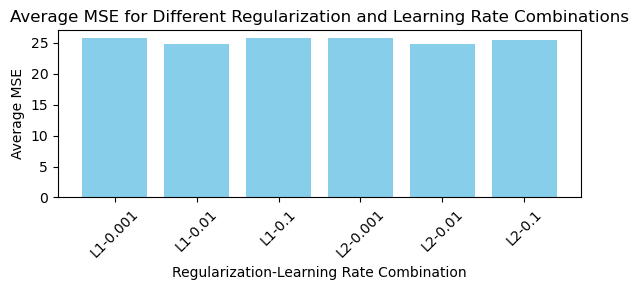

In [86]:
# now each of those regularization/learning rate combos will be run 100 times and the errors of the
# trials will be averaged to determine more accurate error values

avg_mse1 = get_avg_mse(0.001, 'l1')
print('The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.001:', avg_mse1)

avg_mse2 = get_avg_mse(0.01, 'l1')
print('The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.01:', avg_mse2)

avg_mse3 = get_avg_mse(0.1, 'l1')
print('The average mse after 100 trials for SGD regression with L1 regulzarization and a learning rate of 0.1:', avg_mse3)

avg_mse4 = get_avg_mse(0.001, 'l1')
print('The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.001:', avg_mse4)

avg_mse5 = get_avg_mse(0.01, 'l2')
print('The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.01:', avg_mse5)

avg_mse6 = get_avg_mse(0.1, 'l2')
print('The average mse after 100 trials for SGD regression with L2 regulzarization and a learning rate of 0.1:', avg_mse6)

visualize_MSE(avg_mse1, avg_mse2, avg_mse3, avg_mse4, avg_mse5, avg_mse6)

In [12]:
# now train AdaBoost Classifier on the data and compare the results
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
# declare decision stumps to use in AdaBoost
stump = DecisionTreeRegressor(max_depth=1)

In [14]:
# declare AdaBoost model
adaboost = AdaBoostRegressor(estimator=stump, n_estimators=5000, learning_rate=0.1)

In [15]:
# get predictions from AdaBoost model and get MSE to compare with linear regression models
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
# using AdaBoost with strict decision stumps (max_depth = 1) performs poorly as the data has too
# many features and the stumps are not able to provide enough information
print('Mean squared error (AdaBoost Regression with decision stumps):', mse)

Mean squared error (AdaBoost Regression with decision stumps): 50.968416349237735


In [16]:
# get the average mse after 100 trials
print('The average mse after 100 trials for AdaBoost regression with decision stumps:', get_avg_mse(adaboost))

The average mse after 100 trials for AdaBoost regression with decision stumps: 50.968416349237735


In [17]:
# try AdaBoost with more complex base estimator
tree = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(estimator=tree, n_estimators=5000, learning_rate=0.1)

adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
# using AdaBoost with strict decision trees allow AdaBoost to gather more information
# and thus make better predictions
print('Mean squared error (AdaBoost Regression with decision trees):', mse)

Mean squared error (AdaBoost Regression with decision trees): 12.918945116547334


In [18]:
# get the average mse after 100 trials
print('The average mse after 100 trials for AdaBoost regression with decision trees:', get_avg_mse(adaboost))

The average mse after 100 trials for AdaBoost regression with decision trees: 12.918945116547334


In [34]:
# now try training a neural network to perform the regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from keras import regularizers

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
# define the neural network and add an input + hidden layers
nn = Sequential()
nn.add(InputLayer((X_train.shape[1],)))
# add a lay with regularization
nn.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# Batch normalization to normalize the outputs from each hidden layer before passing them along
# Batch normalization ensures that the data distribution remains consistent
nn.add(BatchNormalization())
nn.add(Dense(8, activation='relu'))
nn.add(BatchNormalization())
# linear activation function for output layer in regression
nn.add(Dense(1, activation='linear'))

2024-12-03 20:00:29.560813: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
# compile the neural network and fit it to the data
nn.compile(optimizer='adam', loss='mse', metrics=['mse'])

nn.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 565.1252 - mse: 563.6611 - val_loss: 577.2261 - val_mse: 575.7692
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 583.8647 - mse: 582.4086 - val_loss: 555.8215 - val_mse: 554.3700
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 559.4481 - mse: 557.9983 - val_loss: 535.8368 - val_mse: 534.3917
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 528.0127 - mse: 526.5696 - val_loss: 516.2354 - val_mse: 514.7963
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 496.6569 - mse: 495.2192 - val_loss: 502.5255 - val_mse: 501.0912
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 514.3332 - mse: 512.9005 - val_loss: 485.1458 - val_mse: 483.7179
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 507.1411 - mse: 505.7148 - val_loss: 466.5573 - val_mse: 465.1356
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 471.2674 - mse: 469.8467 - val_loss: 449.7429 - val_mse: 448.3273

In [22]:
# now get predictions on the test data and mse
y_pred = nn.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [23]:
# it is clear that the neural network performed well but also required the most computational resources
# the neural network was able to capture nuances and nonlinearity in the data that the linear regression
# may not have been able to. However, AdaBoost with decision trees performed better and was both easier to
# write and computationally more efficient than a neural network
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
print('Mean squared error (neural network):', mse)

Mean squared error (neural network): 12.985176286820806


In [24]:
# get the average mse after 100 trials
print('The average mse after 100 trials for a neural network:', get_avg_mse(nn))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━